# Canine attributes visualization

In [1]:
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 200

## Import data

In [2]:
nyc_registry = pd.read_csv('../dogdata/NYC_Dog_Licensing_Dataset_2015-edit.csv')
coren = pd.read_csv('../dogdata/coren-edit.csv')
# nyc_census = pd.read_csv('../censusdata/ACS_16_1YR_S0201_with_ann-edit.csv') # use 2016 data
edmonton_registry = pd.read_csv('../dogdata/Edmonton_Pet_Licenses_by_Neighbourhood_2018-edit.csv')
adelaide_registry = pd.read_csv('../dogdata/Dog_Registrations_Adelaide_2016-edit.csv')
seattle_registry = pd.read_csv('../dogdata/Seattle_Pet_Licenses-2018-edit2.csv')
wiki = pd.read_csv('../dogdata/wiki-edit.csv')
turcsan = pd.read_csv('../dogdata/turcsan.csv')

# List of attributes
# lst = ['Trainable', 'Obedient', 'Bold', 'Calm','Sociable']
lst = ['Trainable', 'Bold', 'Calm','Sociable']
borough = ['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
# Pare down the Coren data
coren = coren[['Breed', 'Obedient']]
# Combine the Coren and Turcsan datasets
attrib = coren.set_index('Breed').join(turcsan.set_index('Breed'), how='outer')
attrib.head()

,Obedient,Calm,Trainable,Sociable,Bold
Breed,,,,,
Affenpinscher,0.7,NaN,NaN,NaN,NaN
Afghan Hound,0.1,NaN,NaN,NaN,NaN
Airedale Terrier,0.7,1.0,0.5,1.0,1.0
Akita,0.5,NaN,NaN,NaN,NaN
Alaskan Malamute,0.5,1.0,0.0,0.5,0.0


In [3]:
adelaide_registry.replace(to_replace='Labrador',value='Labrador Retriever', inplace=True)

## Code: functions to display and manage data

In [4]:
def plot_by_attrib(df, categ,label, filename=None, display=True):
    """Plot a graph by the attributes provided.
    
    Arguments:
        df {DataFrame} -- DF to plot
        categ {list} -- Categories to plot
        label {str} -- Label for what the data is describing
    
    Keyword Arguments:
        filename {str} -- Name of the file to optionally save (default: {None})
        display {bool} -- Whether or not to display the plot (default: {True})
    """
    fig, ax = plt.subplots()
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', rotation_mode='anchor')
    for item in categ:
        ax.plot(df.index, df[item])

    plt.gcf().subplots_adjust(bottom=0.3, right=.75)
    plt.legend(loc=(1.04,0.6))
    plt.title('Scores by '+ label)
    ax.set_ylabel('Score')
    ax.set_xlabel(label)
    if filename is not None:
        plt.savefig('../plots/'+filename)
    if display:
        plt.show()


def splitDataFrameList(df,target_column,separator):
    """Thanks to James Allen, https://gist.github.com/jlln/338b4b0b55bd6984f883
    
    Arguments:
        df {DataFrame} -- DataFrame to split,
        target_column {string} -- The column containing the values to split
        separator {str} -- The symbol used to perform the split
    
    Returns:
        DataFrame -- A dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    """
    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

# Attributes by AKC groupings
Similar to what Turcsán did in her paper

In [5]:
wiki_akc = wiki[['Breed', 'AKC']]
akc_groups_attrib = wiki_akc.set_index('Breed').join(attrib, how='left')
akc_groups_attrib.head()

,AKC,Obedient,Calm,Trainable,Sociable,Bold
Breed,,,,,,
Affenpinscher,Toy,0.7,NaN,NaN,NaN,NaN
Afghan Hound,Hound,0.1,NaN,NaN,NaN,NaN
Airedale Terrier,Terrier,0.7,1.0,0.5,1.0,1.0
Akita,Working,0.5,NaN,NaN,NaN,NaN
Alaskan Malamute,Working,0.5,1.0,0.0,0.5,0.0



AKC Mean
              Obedient  Calm  Trainable  Sociable  Bold
AKC                                                    
Herding           0.77  0.30       0.85      0.45  0.30
Hound             0.40  0.50       0.67      0.58  0.33
Non-Sporting      0.51  0.44       0.67      0.44  0.22
Sporting          0.73  0.67       0.62      0.67  0.62
Terrier           0.51  0.30       0.75      0.30  0.35
Toy               0.40  0.62       0.25      0.56  0.69
Working           0.60  0.45       0.73      0.41  0.36


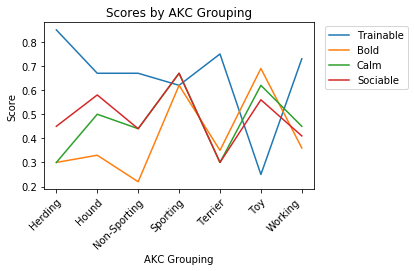

In [105]:
print('\nAKC Mean')
akc = akc_groups_attrib.groupby('AKC').mean().round(decimals=2)
pprint(akc)
# Plot the AKC grouping data
plot_by_attrib(akc, lst, 'AKC Grouping')

## Strip out NYC dirty values

In [9]:
nyc_registry['Borough'] = nyc_registry['Borough'].map(lambda x: None if x not in {'Brooklyn', 'Bronx', 'Staten Island', 'Manhattan', 'Queens'} else x)
nyc_registry.replace(to_replace='Unknown',value=np.nan, inplace=True)
nyc_registry.replace(to_replace='American Pit Bull Mix / Pit Bull Mix',value='Pit Bull Mix', inplace=True)
nyc_registry.replace(to_replace='American Pit Bull Terrier/Pit Bull',value='American Staffordshire Terrier', inplace=True)
nyc_registry.dropna(inplace=True)
nyc_registry.head()

,RowNumber,AnimalName,AnimalGender,AnimalBirthMonth,BreedName,Borough,ZipCode,CommunityDistrict,CensusTract2010,NTA,CityCouncilDistrict,CongressionalDistrict,StateSenatorialDistrict,LicenseIssuedDate,LicenseExpiredDate
0,1753.0,SHADOW,M,1/1/00 0:00,Beagle,Brooklyn,11236.0,318.0,1014.0,BK50,46.0,8.0,19.0,12/29/14,1/30/16
1,2415.0,ROCCO,M,10/1/11 0:00,Boxer,Brooklyn,11210.0,314.0,756.0,BK43,45.0,9.0,17.0,1/7/15,1/30/16
2,3328.0,LUIGI,M,9/1/05 0:00,Maltese,Bronx,10464.0,210.0,516.0,BX10,13.0,14.0,34.0,1/17/15,2/2/16
3,7537.0,PETUNIA,F,8/1/13 0:00,Pug,Brooklyn,11221.0,304.0,419.0,BK78,34.0,7.0,18.0,3/1/15,3/28/16
4,8487.0,ROMEO,M,10/1/08 0:00,Maltese,Bronx,10451.0,201.0,65.0,BX34,17.0,15.0,32.0,3/9/15,3/9/16


## NYC dog attributes and breeds

In [106]:
nyc_attrib = nyc_registry.set_index('BreedName').join(attrib, how='left')
nyc_attrib = nyc_attrib[['Borough','Calm', 'Trainable', 'Sociable', 'Bold']]
nyc_attrib_g = nyc_attrib.groupby('Borough')
pprint(nyc_attrib_g.count())

                Calm  Trainable  Sociable   Bold
Borough                                         
Bronx           6516       6516      6516   6516
Brooklyn       13996      13996     13996  13996
Manhattan      19680      19680     19680  19680
Queens         11741      11741     11741  11741
Staten Island   5201       5201      5201   5201


In [107]:
nyc_breeds = nyc_registry[['Borough', 'BreedName']]
nyc_breeds_count = pd.DataFrame(nyc_breeds['BreedName'].value_counts(normalize=True))
nyc_breeds_count.rename(columns={'index': 'Breed', 'BreedName':'NYC_NormalizedCount'}, inplace=True)
nyc_breeds_count['NYC_Count']= nyc_breeds['BreedName'].value_counts(normalize=False)
nyc_breeds_count.head()

,NYC_NormalizedCount,NYC_Count
Yorkshire Terrier,0.073294,7412
Shih Tzu,0.067588,6835
Chihuahua,0.054931,5555
Maltese,0.040711,4117
Labrador Retriever,0.040098,4055


## Seattle dog attributes and breeds

In [100]:
# Add attributes to data set
seattle_attrib = seattle_registry[pd.isnull(seattle_registry['Secondary Breed'])]
seattle_attrib = seattle_registry.set_index('Primary Breed').join(attrib, how='left')

# Isolate breeds
seattle_breeds = seattle_registry[['Primary Breed']]
seattle_breeds_count = pd.DataFrame(seattle_breeds['Primary Breed'].value_counts(normalize=True))
seattle_breeds_count.rename(columns={'index': 'Breed', 'Primary Breed':'Seattle_NormalizedCount'}, inplace=True)
# seattle_breeds_count['Count']= seattle_breeds['Primary Breed'].value_counts(normalize=False)
seattle_breeds_count['Seattle_Count']= seattle_breeds['Primary Breed'].value_counts(normalize=False)
# seattle_breeds_count['City']= ["Seattle"] * len(seattle_breeds_count)
seattle_breeds_count.head()

,Seattle_NormalizedCount,Seattle_Count
Labrador Retriever,0.139025,2534
Golden Retriever,0.061886,1128
Chihuahua,0.054205,988
German Shepherd,0.030120,549
Miniature Poodle,0.025896,472


## Adelaide dog attributes and breeds

In [101]:
# Add attributes to data set
adelaide_attrib = adelaide_registry.set_index('AnimalBreed').join(attrib, how='left')

# Isolate breeds
adelaide_breeds = adelaide_registry[['AnimalBreed']]
adelaide_breeds_count = pd.DataFrame(adelaide_breeds['AnimalBreed'].value_counts(normalize=True))
adelaide_breeds_count.rename(columns={'index': 'Breed', 'AnimalBreed':'Adelaide_NormalizedCount'}, inplace=True)
# adelaide_breeds_count['Count']= adelaide_breeds['AnimalBreed'].value_counts(normalize=False)
adelaide_breeds_count['Adelaide_Count']= adelaide_breeds['AnimalBreed'].value_counts(normalize=False)
# adelaide_breeds_count['City']= ['Adelaide'] * len(adelaide_breeds_count)
adelaide_breeds_count.head()

,Adelaide_NormalizedCount,Adelaide_Count
Maltese,0.108069,1737
Staffordshire Bull Terrier,0.062278,1001
Labrador Retriever,0.058608,942
Jack Russell Terrier,0.056679,911
Chihuahua,0.043551,700


## Edmonton dog attributes and breeds

In [102]:
# Add attributes to data set
edmonton_attrib = edmonton_registry.set_index('BREED').join(attrib, how='left')

# Isolate breeds
edmonton_breeds = edmonton_registry[['BREED']]
edmonton_breeds_count = pd.DataFrame(edmonton_breeds['BREED'].value_counts(normalize=True))
edmonton_breeds_count.rename(columns={'index': 'Breed', 'BREED':'Edmonton_NormalizedCount'}, inplace=True)
# edmonton_breeds_count['Count']= edmonton_breeds['BREED'].value_counts(normalize=False)
edmonton_breeds_count['Edmonton_Count']= edmonton_breeds['BREED'].value_counts(normalize=False)
# edmonton_breeds_count['City'] = ["Edmonton"] * len(edmonton_breeds_count)
edmonton_breeds_count.head()

,Edmonton_NormalizedCount,Edmonton_Count
Labrador Retriever,0.091606,5426
Shih Tzu,0.080176,4749
German Shepherd,0.063006,3732
Chihuahua,0.044841,2656
Border Collie,0.040164,2379


## Coordinates for each city

In [18]:
coords = pd.DataFrame({
    'City': {0: 'NYC', 1: 'Seattle', 2: 'Edmonton', 3: 'Adelaide'}, 
    'lat': {0: 40.7, 1: 47.6, 2: 53.5, 3: -34.9}, 
    'lon': {0: -74.0, 1: -122.3, 2: -113.5, 3: 138.6},
#     'radius': {0:20, 1:20, 2:20, 3:20}
})

## Create combined breeds data set

In [103]:
# combined_breeds = pd.merge((pd.merge(nyc_breeds_count.reset_index(), seattle_breeds_count.reset_index(), how= 'outer')), (pd.merge(edmonton_breeds_count.reset_index(), adelaide_breeds_count.reset_index(), how= 'outer')), how='outer')

combined_breeds = pd.concat([nyc_breeds_count, seattle_breeds_count, edmonton_breeds_count, adelaide_breeds_count], axis =1).reset_index()
# combined_breeds.rename(columns={'index': 'Breed', 'BreedName':'New York', 'Primary Breed':'Seattle', 'BREED':'Edmonton', 'AnimalBreed':'Adelaide'}, inplace=True)
combined_breeds.rename(columns={'index': 'Breed'}, inplace=True)


combined_breeds = combined_breeds.melt(id_vars=['Breed'], var_name = ['City'], value_name = 'Value')
combined_breeds['Count']= combined_breeds['City'].str.split('_').str[1]
combined_breeds['City']= combined_breeds['City'].str.split('_').str[0]
combined_breeds['Value'] = combined_breeds['Value'].fillna(value = 0)
combined_breeds = combined_breeds.pivot_table(index = ['Breed', 'City'], columns = 'Count', values = 'Value').reset_index()
# combined_breeds_coords = combined_breeds.merge(coords, on = 'City')
combined_breeds_coords = combined_breeds.merge(coords, on = 'City')
combined_breeds_coords.head()

,Breed,City,Count,NormalizedCount,lat,lon
0,Abyssinian,Adelaide,0.0,0.000000,-34.9,138.6
1,Affen Pinscher,Adelaide,0.0,0.000000,-34.9,138.6
2,Affenpinscher,Adelaide,0.0,0.000000,-34.9,138.6
3,Afghan,Adelaide,3.0,0.000187,-34.9,138.6
4,Afghan Hound,Adelaide,0.0,0.000000,-34.9,138.6


## Breed selection 

In [29]:
print(combined_breeds_coords.Breed.unique())

['Abyssinian' 'Affen Pinscher' 'Affenpinscher' 'Afghan' 'Afghan Hound'
 'Afghan Hound Crossbreed' 'Airedale Terrier' 'Akbash' 'Akita'
 'Akita Crossbreed' 'Alapaha Blue Blood Bulldog' 'Alaskan Husky'
 'Alaskan Klee Kai' 'Alaskan Malamute' 'Alsatian' 'American Blue Heeler'
 'American Bobtail' 'American Bull Mastiff' 'American Bulldog'
 'American Bully' 'American Cocker Spaniel' 'American Curl (Short Hair)'
 'American English Coonhound' 'American Eskimo'
 'American Eskimo (Miniature)' 'American Eskimo (Toy)'
 'American Eskimo dog' 'American Foxhound' 'American Hairless Terrier'
 'American Indian Dog' 'American Leopard Hound'
 'American Pit Bull Terrier' 'American Spoodle'
 'American Staffordshire Bull Terrier' 'American Staffordshire Terrier'
 'American Staffordshire Terrier ' 'American Water Spaniel'
 'American Wirehair' 'Anatolian Shepherd' 'Anatolian Shepherd Dog'
 'Anotolian Shepherd' 'Argentine Dogo' 'Australian Bulldog'
 'Australian Cattle Dog' 'Australian Cattledog' 'Australian Kel

In [79]:
import plotly.graph_objects as go
token = 'pk.eyJ1IjoibWljYWVsYW1jY2FsbCIsImEiOiJjazRnOG44MWswZnFoM2xuNTg0dDgxNzkzIn0.GhKyS8bwcdfURDDLtEdr3Q'

breed_selection = 'Akita'

breedmap = go.Figure(go.Scattermapbox(
    lat = combined_breeds_coords[combined_breeds_coords.Breed == breed_selection].lat, 
    lon = combined_breeds_coords[combined_breeds_coords.Breed == breed_selection].lon,
    hoverinfo = 'text',
    text = ['Number of Dogs: {}'.format(i) for i in combined_breeds_coords[(combined_breeds_coords.Breed == breed_selection) ].Count.astype('int')], 
    mode = 'markers', 
    marker = dict(
        cmax = 0.1,
        cmin = 0,
        size = 20,
        opacity = 0.6,
        symbol = 'circle',
        color = combined_breeds_coords[(combined_breeds_coords.Breed == breed_selection)].NormalizedCount,
        colorscale = 'OrRd',
        colorbar_title="Normalized Count")))

breedmap.update_layout(
    title_text="Plotting Breed Counts by City",
    autosize=False,
    hovermode='closest',
    mapbox=go.layout.Mapbox(
        accesstoken=token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=10,
            lon=-160
        ),
        pitch=0,
        zoom=0.5,
        style='dark'
    ),
)

breedmap.show()

## Create combined attributes dataset

In [104]:
adelaide_mean = adelaide_attrib[lst].mean()
edmonton_mean = edmonton_attrib[lst].mean()
nyc_mean = nyc_attrib[lst].mean()
seattle_mean = seattle_attrib[lst].mean()
combined_attrib = pd.concat([nyc_mean,seattle_mean,edmonton_mean,adelaide_mean], axis=1).reset_index()
combined_attrib.rename(columns={'index': 'Attribute', 0:'NYC', 1:'Seattle', 2:'Edmonton', 3:'Adelaide'}, inplace=True)
combined_attrib = combined.melt(id_vars=['Attribute'], var_name = ['City'], value_name = 'Average')
combined_attrib_coords = combined.merge(coords, on='City')
combined_attrib_coords.head()

,Attribute,City,Average,lat,lon
0,Trainable,NYC,0.465406,40.7,-74.0
1,Bold,NYC,0.581038,40.7,-74.0
2,Calm,NYC,0.446582,40.7,-74.0
3,Sociable,NYC,0.453863,40.7,-74.0
4,Trainable,Seattle,0.597293,47.6,-122.3


## Attribute selection

In [82]:
combined_coords.Attribute.unique()

array(['Trainable', 'Bold', 'Calm', 'Sociable'], dtype=object)

In [83]:
attrib_selection = 'Trainable'

attributemap = go.Figure([go.Scattermapbox(
    lat = combined_attrib_coords[combined_attrib_coords.Attribute == attrib_selection].lat, 
    lon = combined_attrib_coords[combined_attrib_coords.Attribute == attrib_selection].lon,
    hoverinfo= "text", 
    text = ['{} Score: {}'.format(*i) for i in zip(combined_attrib_coords[combined_attrib_coords.Attribute == attrib_selection].City, combined_attrib_coords[combined_attrib_coords.Attribute == attrib_selection].Average.round(decimals= 2))],
    mode = 'markers', 
    marker = dict(
        cmin = 0.4,
        cmax= 0.6,
        size = 20,
        opacity = 0.6,
        symbol = 'circle',
        color = combined_attrib_coords[combined_attrib_coords.Attribute == attrib_selection].Average,
        colorscale = 'OrRd',
        colorbar_title="Score"))])

attributemap.update_layout(
    title_text="Attribute Scores by City",
    autosize=False,
    hovermode='closest',
    mapbox=go.layout.Mapbox(
        accesstoken=token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=10,
            lon=-160
        ),
        pitch=0,
        zoom=0.5,
        style='light'
    ),
)


attributemap.show()

In [ ]:
combined_attrib_coords.to_csv('../dogdata/combined_attrib_coords.csv')
combined_breeds_coords.to_csv('../dogdata/combined_breeds_coords.csv')

## Top 5 breeds in each city

In [95]:
combined_breeds_coords[['City','Breed','Count']].groupby(by='City').apply(lambda x: x.nlargest(5, 'Count')).set_index('City')

,Breed,Count
City,,
Adelaide,Maltese,1737.0
Adelaide,Staffordshire Bull Terrier,1001.0
Adelaide,Labrador Retriever,942.0
Adelaide,Jack Russell Terrier,911.0
Adelaide,Chihuahua,700.0
Edmonton,Labrador Retriever,5426.0
Edmonton,Shih Tzu,4749.0
Edmonton,German Shepherd,3732.0
Edmonton,Chihuahua,2656.0


## East coast vs. West coast

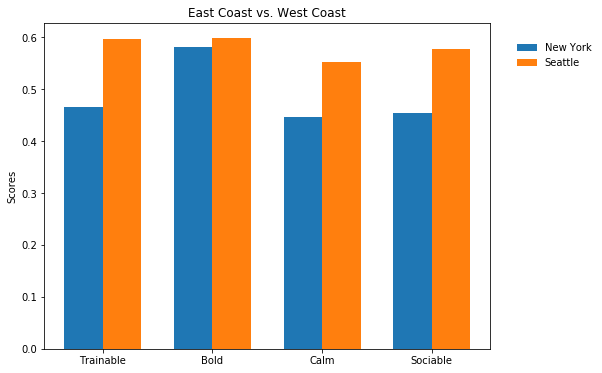

In [36]:
x = np.arange(len(nyc_mean.index))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
rects1 = ax.bar(x - width/2, nyc_mean, width, label='New York')
rects1 = ax.bar(x + width/2, seattle_mean, width, label='Seattle')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('East Coast vs. West Coast')
ax.set_xticks(x)
ax.set_xticklabels(nyc_mean.index)
ax.legend(loc='lower left', bbox_to_anchor= (1.05, .85), ncol=1, 
            borderaxespad=0, frameon=False)

## Ancestral origin


UK and Ireland Mean
          Obedient  Calm  Trainable  Sociable  Bold
Origin                                             
England       0.51  0.70        0.4      0.65   0.7
Ireland       0.62  0.75        0.5      0.62   0.5
Scotland      0.59  0.80        0.6      0.80   0.8
Wales         0.59  0.00        1.0      0.00   0.0

UK and Ireland Standard Deviation
          Obedient  Calm  Trainable  Sociable  Bold
Origin                                             
England       0.21  0.48       0.32      0.47  0.42
Ireland       0.15  0.50       0.41      0.48  0.58
Scotland      0.25  0.45       0.22      0.45  0.45
Wales         0.24   NaN        NaN       NaN   NaN

UK and Ireland Count
          Obedient  Calm  Trainable  Sociable  Bold
Origin                                             
England         19    10         10        10    10
Ireland          6     4          4         4     4
Scotland        10     5          5         5     5
Wales            4     1          1   

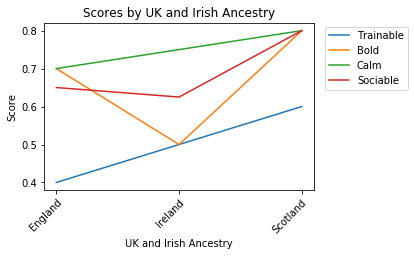

In [96]:
ancestral = wiki[['Breed', 'Origin']]
ancestral_uk_ire = ancestral.copy()
ancestral_uk_ire.dropna(inplace=True)
ancestral_uk_ire = ancestral_uk_ire[ancestral_uk_ire['Origin'].isin(['England', 'Scotland', 'Wales', 'Ireland'])]
ancestral_uk_ire = ancestral_uk_ire.set_index('Breed').join(attrib, how='inner')
ancestral_uk_ire_grp = ancestral_uk_ire.groupby('Origin')
ancestral_uk_ire_mean = ancestral_uk_ire_grp.mean()
print('\nUK and Ireland Mean')
print(ancestral_uk_ire_grp.mean().round(decimals=2))
print('\nUK and Ireland Standard Deviation')
print(ancestral_uk_ire_grp.std().round(decimals=2))
print('\nUK and Ireland Count')

print(ancestral_uk_ire_grp.count())

# Plot the UK and Ireland data
# Remove Wales since it only has one dog for some of the data
ancestral_uk_ire_mean.drop('Wales', inplace=True)
plot_by_attrib(ancestral_uk_ire_mean, lst, 'UK and Irish Ancestry')

# Combining Scotland, Wales, and England as United Kingdom
ancestral['Origin'] = ancestral['Origin'].map(lambda x: 'United Kingdom' if x in {'England', 'Wales', 'Scotland'} else x)
ancestral_attrib = ancestral.set_index('Breed').join(attrib, how='inner')

In [98]:
ancestral_attrib.dropna(inplace=True)
ancestral_attrib2 = splitDataFrameList(ancestral_attrib,'Origin', '/')
ancestral_attrib2['Origin'] = ancestral_attrib2['Origin'].map(lambda x: 'China' if x == 'Tibet (China)' else x)
ancestral_attrib2.head()

,Bold,Calm,Obedient,Origin,Sociable,Trainable
0,1.0,1.0,0.7,United Kingdom,1.0,0.5
1,0.0,1.0,0.5,United States,0.5,0.0
2,0.0,0.0,0.7,United States,0.0,1.0
3,0.0,0.0,0.5,United States,0.0,1.0
4,1.0,1.0,0.1,United Kingdom,1.0,0.5


In [63]:
ancestral_uk = ancestral_attrib2[ancestral_attrib2['Origin'] == 'United Kingdom']
ancestral_not_uk = ancestral_attrib2[~(ancestral_attrib2['Origin'] == 'United Kingdom')]
ancestral_uk_bold = ancestral_uk['Bold']
ancestral_uk_bold.dropna(inplace=True)
ancestral_not_uk_bold = ancestral_not_uk['Bold']
ancestral_not_uk_bold.dropna(inplace=True)
ancestral_uk_obedient = ancestral_uk['Obedient']
ancestral_not_uk_obedient = ancestral_not_uk['Obedient']